In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import openmc
from openmc.deplete import Results
from openmc.deplete.abc import _SECONDS_PER_MINUTE, _SECONDS_PER_HOUR, _SECONDS_PER_DAY
group_types = ('casmo8', 'casmo40')
integrator_types = ('predictor', 'cecm')
time_types = [('minutes', _SECONDS_PER_MINUTE, 'minutes'), 
              ('hours', _SECONDS_PER_HOUR, 'hours'),
              ('days', _SECONDS_PER_DAY, 'days'),
              ('months', _SECONDS_PER_DAY, 'days')]
normalization_types = ('source_rate', 'fission_q')
depletion_types = [('simple', '../../openmc/tests/chain_simple.xml'), ('full', 'chain_endbf71_pwr.xml')]


In [5]:
group_type = 1
time_type = 0
integrator_type = 1
normalization_type = 1
depletion_type = 1

group_type = group_types[group_type]
time_type, time_scale_factor, time_unit = time_types[time_type]
integrator_type = integrator_types[integrator_type]
normalization_type = normalization_types[normalization_type]
depletion_type, chain_file = depletion_types[depletion_type]

case1_results = Results(f'case1/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
case2_results = Results(f'{group_type}/case2/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')

#path = f'case3/{integrator_type}/{depletion_type}_depletion_results_{time_type}_'
#case3_results = Results()
#for i in range(0,11):
#    case3_results.append(Results(path + f'{i}.h5')[0])

#t = case1_results[0].time
#for i, res in enumerate(case3_results):
#    times = [0,0]
#    times[0] = t[1] * i
#    times[1] = t[1] * (i+1)
#    res.time = times
        
time, _ = case1_results.get_atoms("1", "U235")
time /= time_scale_factor
chain = openmc.deplete.Chain.from_xml(chain_file)

atoms_dict = {}
rx_dict = {}
for nuc in chain.nuclides:
    nuc_name = nuc.name
    atoms = (case1_results.get_atoms("1", nuc_name)[1], 
             case2_results.get_atoms("1", nuc_name)[1])#,
             #case3_results.get_atoms("1", nuc_name)[1])
    atoms_dict[nuc_name] = atoms
    rx_dict.update({nuc_name: {}})
    for rx in nuc.reactions:
        rx_name = rx.type
        reactions = (case1_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                     case2_results.get_reaction_rate('1', nuc_name, rx_name)[1])#,
                     #case3_results.get_reaction_rate('1', nuc_name, rx_name)[1])
        rx_dict[nuc_name].update({rx_name: reactions})
        
atoms_dict.keys()

dict_keys(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'He3', 'He4', 'He5', 'He6', 'He7', 'He8', 'He9', 'He10', 'Li4', 'Li5', 'Li6', 'Li7', 'Li8', 'Li9', 'Li10', 'Li11', 'Li12', 'Be5', 'Be6', 'Be8', 'Be9', 'Be10', 'Be11', 'Be12', 'Be13', 'Be14', 'Be15', 'Be16', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'O12', 'O13', 'O14', 'O15', 'O16', 'O17', 'O18', 'O19', 'O20', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O27', 'O28', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'Ne16', 'Ne17', 'Ne18', 'Ne19', 'Ne20', 'Ne21', 'Ne22', 'Ne23', 'Ne24', 'Ne25', 'Ne26', 'Ne27', 'Ne28', 'Ne29', 'Ne30', 'Ne31', 'Ne32', 'Ne33', 'Ne34', 'Na18', 'Na19', 'Na20', 'Na21', 'N

In [6]:
atoms_dict['Pu241']

(array([5.54176944e+02, 6.19879669e+02, 1.19217562e+03, 4.17919641e+03,
        1.36900045e+04, 3.61905857e+04, 8.03573300e+04, 1.57587695e+05,
        2.80265872e+05, 4.62418320e+05, 7.21716436e+05]),
 array([5.54176944e+02, 6.19889787e+02, 1.19325522e+03, 4.17567650e+03,
        1.36825434e+04, 3.62077484e+04, 8.05479943e+04, 1.57625029e+05,
        2.80274934e+05, 4.63037751e+05, 7.21962212e+05]))

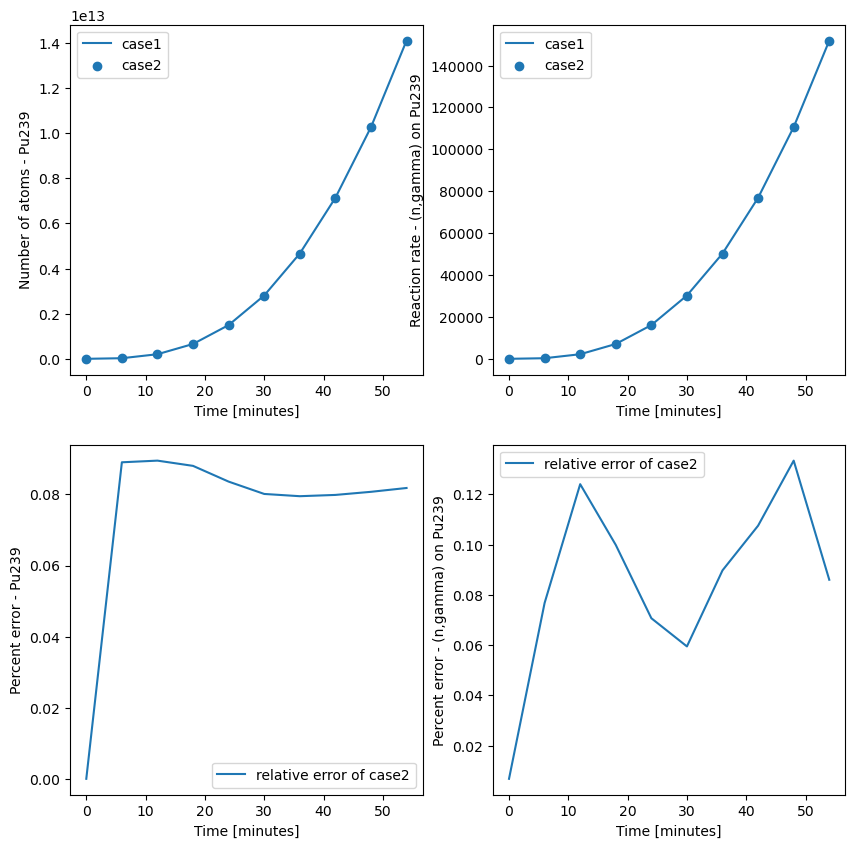

In [7]:
nuc = 'Pu239'
rx = '(n,gamma)'
i = -1
j = -1
c1_atoms, c2_atoms = atoms_dict[nuc]#, c3_atoms = atoms_dict[nuc]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.plot(time[:i], c1_atoms[:i], label="case1")
ax1.scatter(time[:i], c2_atoms[:i], label="case2")
#ax1.scatter(time[:i], c3_atoms[:i], label="case3")
ax1.set_xlabel(f"Time [{time_unit}]")
ax1.set_ylabel(f"Number of atoms - {nuc}");
ax1.legend()

at_error21 = 100 * abs((c2_atoms - c1_atoms) / c1_atoms)
#at_error31 = 100 * abs((c3_atoms - c1_atoms) / c1_atoms)
#at_error23 = 100 * abs((c2_atoms - c3_atoms) / c3_atoms)
ax3.plot(time[:j], at_error21[:j], label="relative error of case2")
#ax3.plot(time[:j], at_error31[:j], label="relative error of case3")
ax3.set_xlabel(f"Time [{time_unit}]")
ax3.set_ylabel(f"Percent error - {nuc}")
ax3.legend()

if len(chain.nuclides[chain.nuclide_dict[nuc]].reactions) != 0:
    c1_nuc_rx, c2_nuc_rx = rx_dict[nuc][rx]#, c3_nuc_rx = rx_dict[nuc][rx]
    ax2.plot(time[:i], c1_nuc_rx[:i], label="case1")
    ax2.scatter(time[:i], c2_nuc_rx[:i], label="case2")
    #ax2.scatter(time[:i], c3_nuc_rx[:i], label="case3")
    ax2.set_xlabel(f"Time [{time_unit}]")
    ax2.set_ylabel(f"Reaction rate - {rx} on {nuc}");
    ax2.legend()

    rx_error21 = abs(100 * (c2_nuc_rx - c1_nuc_rx) / c1_nuc_rx)
    #rx_error31 = abs(100 * (c3_nuc_rx - c1_nuc_rx) / c1_nuc_rx)
    #rx_error23 = abs(100 * (c2_nuc_rx - c3_nuc_rx) / c3_nuc_rx)
    ax4.plot(time[:j], rx_error21[:j], label="relative error of case2")
    #ax4.plot(time[:j], rx_error31[:j], label="relative error of case3")
    ax4.set_xlabel(f"Time [{time_unit}]")
    ax4.set_ylabel(f"Percent error - {rx} on {nuc}")
    ax4.legend()

## Figure Testing

In [14]:
time

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.])

In [15]:
from matplotlib import rcParams
import numpy as np
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.axisbelow'] = True
rcParams['font.family'] = 'serif'
rcParams['pdf.use14corefonts'] = True
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 12.0
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [27]:
actinides = [
    'U234', 'U235', 'U236', 'U238', 'U239', 'Np239',
    'Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242',
    'Am241', 'Am242', 'Am242_m1', 'Am243', 'Am244',
    'Cm242', 'Cm243', 'Cm244', 'Cm245', 'Cm246',
]

fission_products = [
    'Kr85', 'Sr90', 'Y90', 'Zr93', 'Mo95', 'Mo97', 'Tc99', 'Ru101', 'Ru106',
    'Rh103', 'Pd105', 'Pd107', 'Ag109', # 'Cd113_m1', 'Sn121_m1', 'Sn126',
    'Te132', 'I129', 'I131', 'Xe131', 'Xe135', 'Cs133', 'Cs134', 'Cs135', 'Cs137',
    'La139', 'Ce142', 'Nd143', 'Nd145', 'Pm147', 'Sm149', 'Sm151',
    # 'Eu155', 'Gd158',
]

#    time_type = 3
#    integrator_type = 0
#    normalization_type = 0
#    depletion_type = 1
group_types = ('casmo8', 'casmo40')
integrator_types = ('predictor', 'cecm')
time_types = {'minutes': (_SECONDS_PER_MINUTE, 'minutes'), 
              'hours': (_SECONDS_PER_HOUR, 'hours'),
              'days': (_SECONDS_PER_DAY, 'days'),
              'months': (_SECONDS_PER_DAY, 'days')}
normalization_types = ('source_rate', 'fission_q')
depletion_types = {'simple': '../openmc/tests/chain_simple.xml', 'full': 'chain_endbf71_pwr.xml'}
#time_type = 'months'
#integrator_type = 'predictor'
#normalization_type = 'source_rate'
#depletion_type = 'full'

from openmc.data import ATOMIC_SYMBOL, zam
def sup_label(name):
    z, a, m = zam(name)
    meta = "\\text{m}" if m > 0 else ""
    sym = ATOMIC_SYMBOL[z]
    return f"$^{{{a}{meta}}}${sym}"

def load_results(group_type, time_type, integrator_type, normalization_type, depletion_type):
    time_scale_factor, time_unit = time_types[time_type]
    chain_file = depletion_types[depletion_type]

    case1_results = Results(f'case1/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
    case2_results = Results(f'{group_type}/case2/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')

    #path = f'case3/{integrator_type}/{depletion_type}_depletion_results_{time_type}_'
    #case3_results = Results()
    #for i in range(0,11):
    #    case3_results.append(Results(path + f'{i}.h5')[0])

    t = case1_results[0].time
    #for i, res in enumerate(case3_results):
    #    times = [0,0]
    #    times[0] = t[1] * i
    #    times[1] = t[1] * (i+1)
    #    res.time = times

    time, _ = case1_results.get_atoms("1", "U235")
    time /= time_scale_factor
    chain = openmc.deplete.Chain.from_xml(chain_file)

    atoms_dict = {}
    rx_dict = {}
    nuclides = chain.nuclides
    for nuc in nuclides:
        nuc_name = nuc.name

        atoms = (case1_results.get_atoms("1", nuc_name)[1], 
                 case2_results.get_atoms("1", nuc_name)[1])#,
                 #case3_results.get_atoms("1", nuc_name)[1])
        atoms_dict[nuc_name] = atoms
        rx_dict.update({nuc_name: {}})
        for rx in nuc.reactions:
            rx_name = rx.type
            reactions = (case1_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                         case2_results.get_reaction_rate('1', nuc_name, rx_name)[1])#,
                         #case3_results.get_reaction_rate('1', nuc_name, rx_name)[1])
            rx_dict[nuc_name].update({rx_name: reactions})
    return atoms_dict, rx_dict, time, time_unit


def isotope_bar_plot(atoms_dict, time, time_unit, group_type,
                     time_type, integrator_type, normalization_type, depletion_type,
                     nuclides, filename, decimals=2, **kwargs):

    print(f'{filename}...')

    #fig, (ax1, ax2) = plt.subplots(1, 2, **kwargs)
    for (case, case_name) in [(1, 'constant_xs')]:

        fig, ax = plt.subplots(**kwargs)
        burn_indices = (1, 4, 7, 10)
        burnup = time
        burnup_units = time_unit
        ind = np.arange(len(nuclides))
        height = 1/(len(burn_indices)+1)
        for i, index in enumerate(burn_indices):
            data_base = np.array([atoms_dict[nuc][0][index] for nuc in nuclides])
            data_case = np.array([atoms_dict[nuc][case][index] for nuc in nuclides])
            diff = np.zeros_like(data_case)
            nonzero = data_case > 0.0
            diff[nonzero] = (data_case[nonzero] - data_base[nonzero])/data_base[nonzero]
            ax.barh(ind + i*height, diff, height, label=f'{burnup[index]} {burnup_units}')

            #data_case1 = np.array([atoms_dict[nuc][0][index] for nuc in nuclides])
            #data_case2 = np.array([atoms_dict[nuc][1][index] for nuc in nuclides])
            #data_case3 = np.array([atoms_dict[nuc][2][index] for nuc in nuclides])
            #diff_case2 = np.zeros_like(data_case2)
            #diff_case3 = np.zeros_like(data_case3)
            #nonzero_case2 = data_case2 > 0.0
            #nonzero_case3 = data_case3 > 0.0
            #diff_case2[nonzero_case2] = (data_case2[nonzero_case2] - data_case1[nonzero_case2])/data_case1[nonzero_case2]
            #diff_case3[nonzero_case3] = (data_case3[nonzero_case3] - data_case1[nonzero_case3])/data_case1[nonzero_case3]

            #ax1.barh(ind + i*height, diff_case2, height, label=f'{burnup[index]} {burnup_units}')
            #ax2.barh(ind + i*height, diff_case3, height, label=f'{burnup[index]} {burnup_units}')


        locs = ind + height*(len(burn_indices)/2 - 0.5)
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals))
        if decimals >= 3:
            ax.xaxis.set_tick_params(rotation=30)
        ax.set_xlabel('(Transport Independent - Transport Coupled)/Transport Coupled')
        ax.set_yticks(locs)
        ax.set_yticklabels([sup_label(x) for x in nuclides])
        ax.set_ylim(locs[0] - 0.5, locs[-1] + 0.5)
        ax.invert_yaxis()
        ax.legend()
        ax.grid()    
        fname = f'{filename}_{group_type}_{case_name}_{integrator_type}_{depletion_type}_{normalization_type}_{time_type}'
        plt.savefig(f'{fname}.pdf')
        fig.close()

figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...


/tmp/ipykernel_314194/1289932503.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(**kwargs)


figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...
figs/actinides...
figs/fission_products...


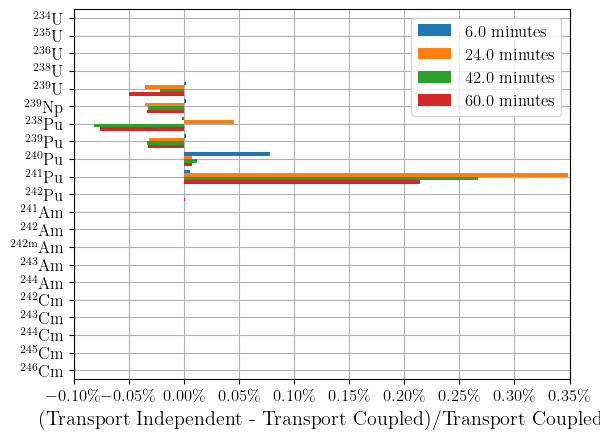

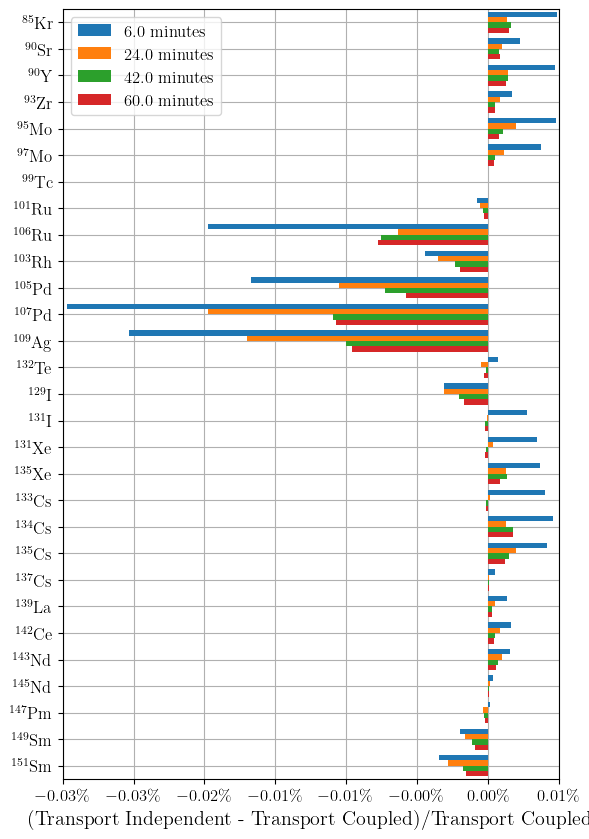

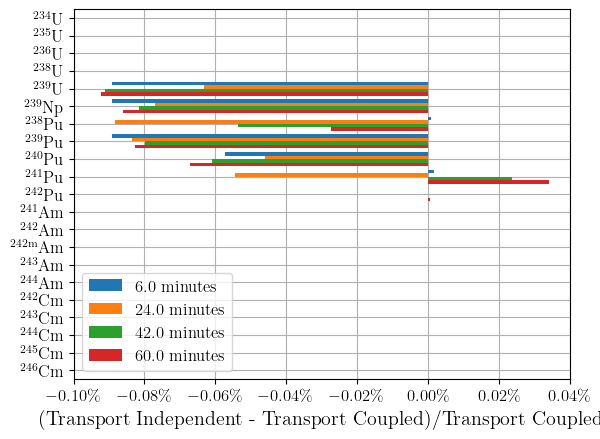

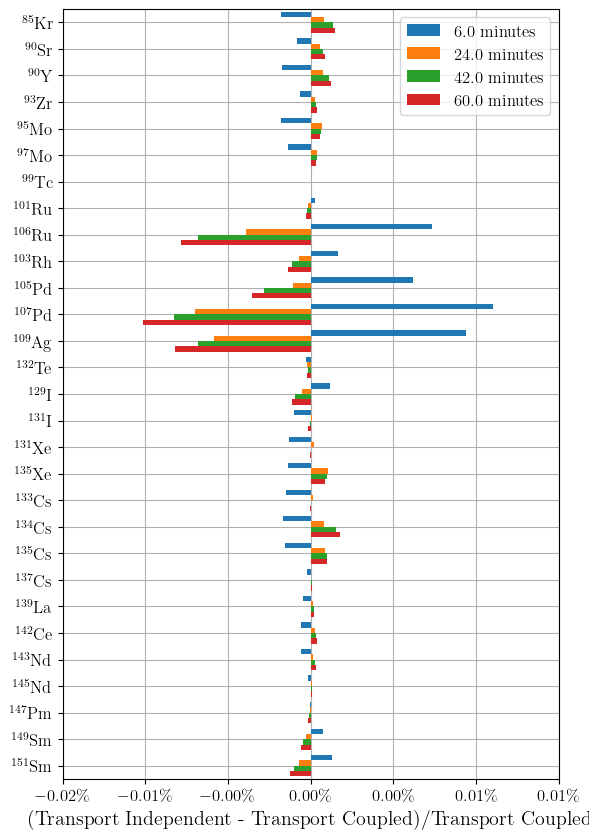

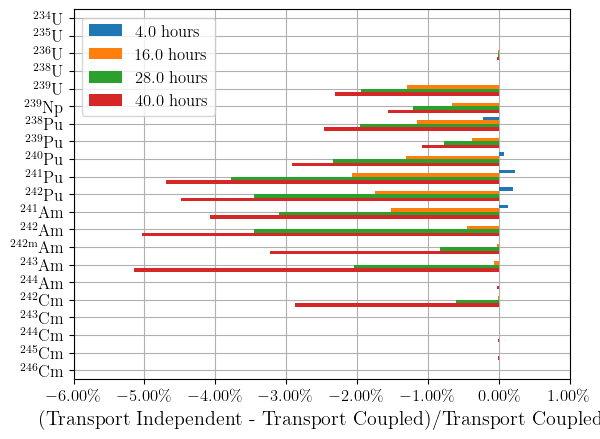

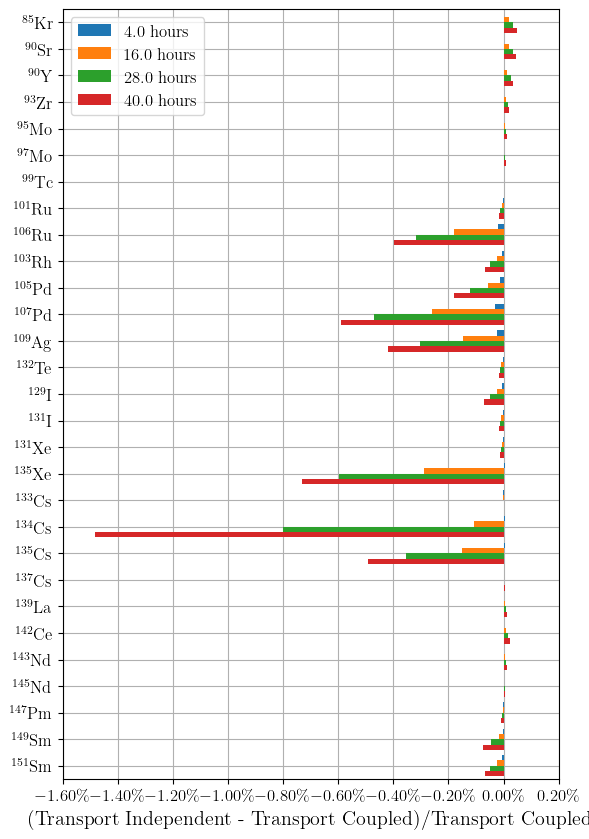

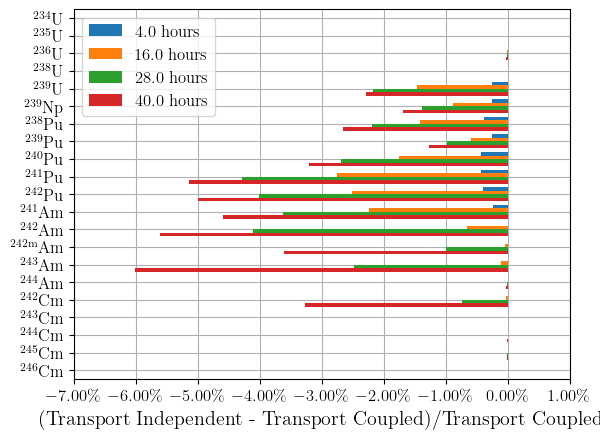

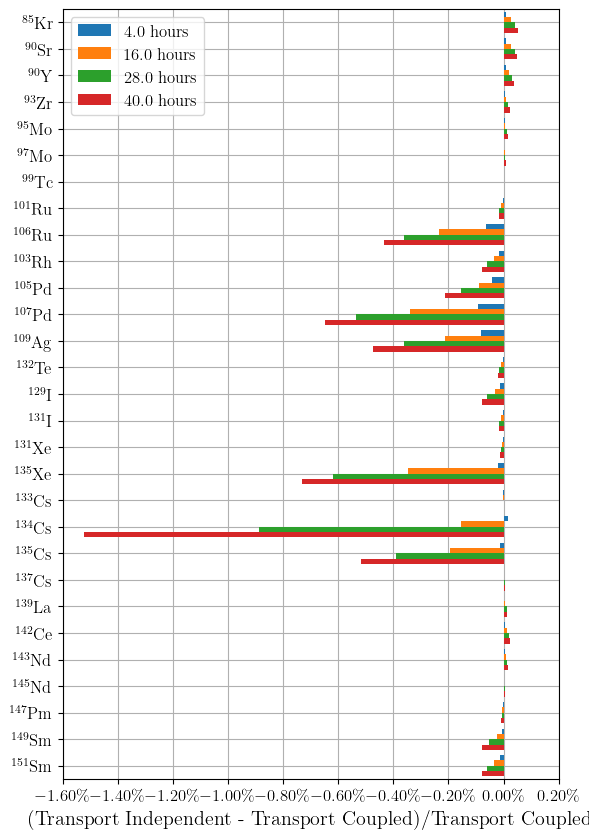

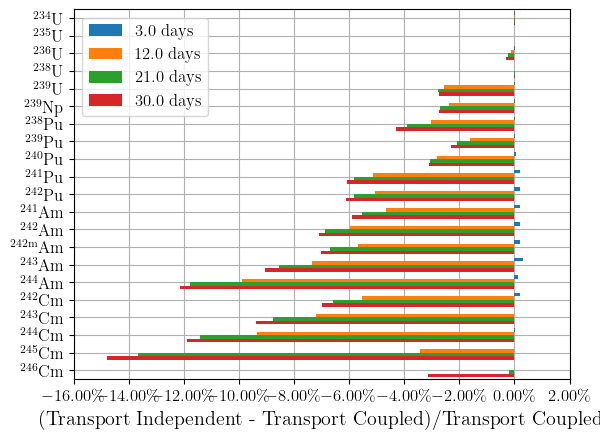

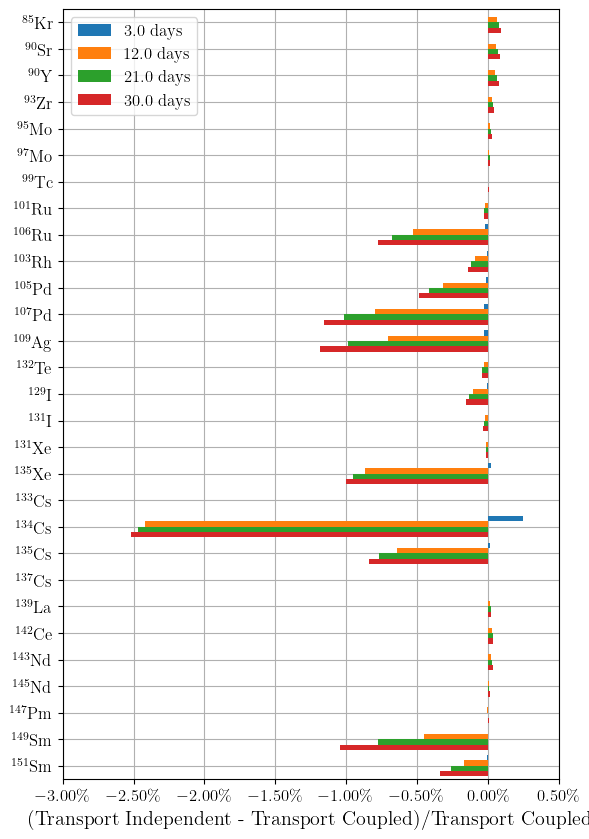

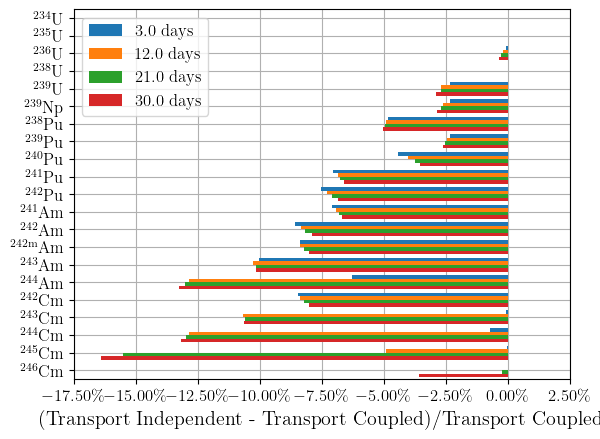

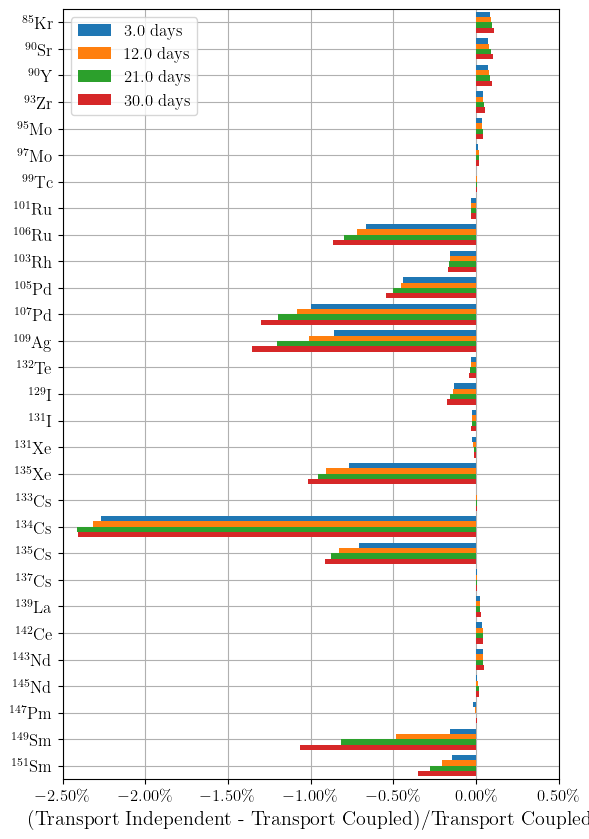

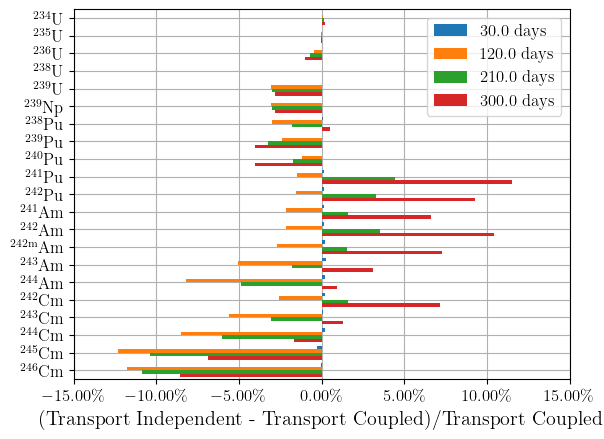

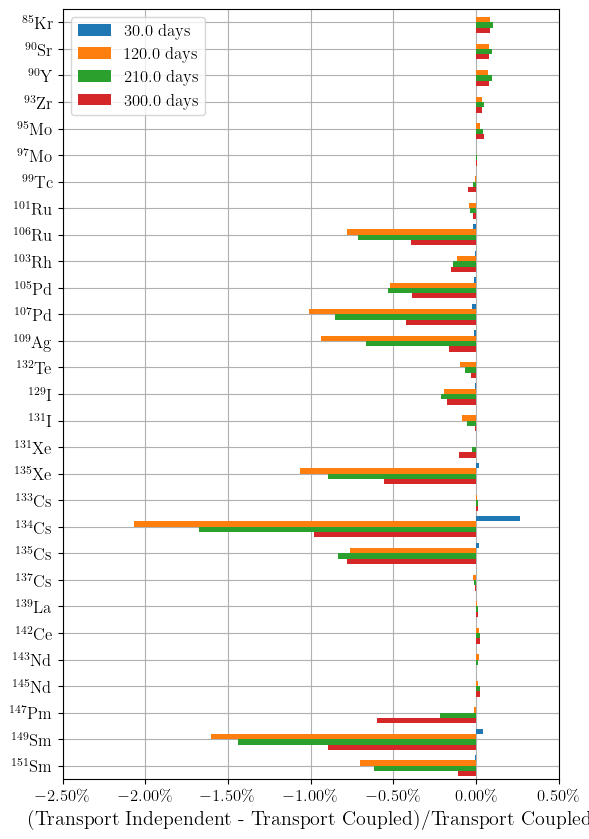

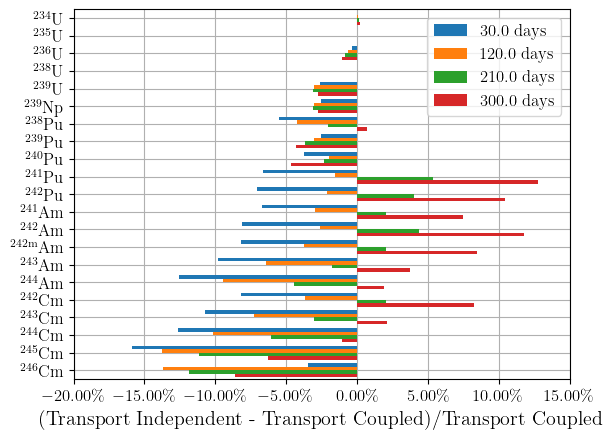

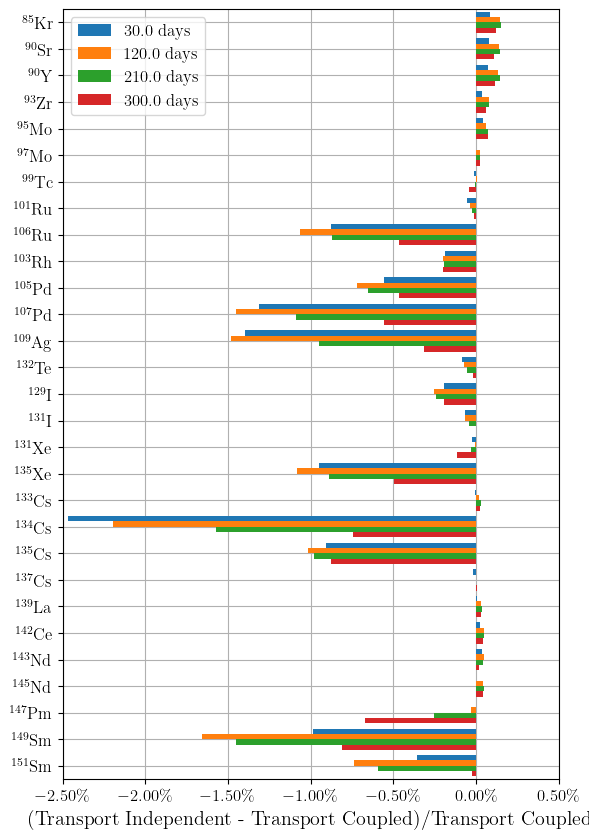

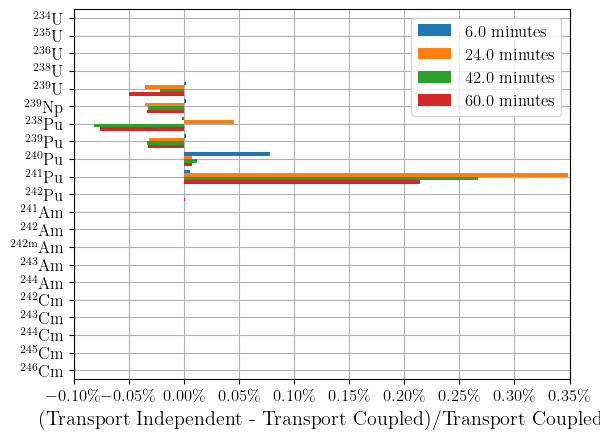

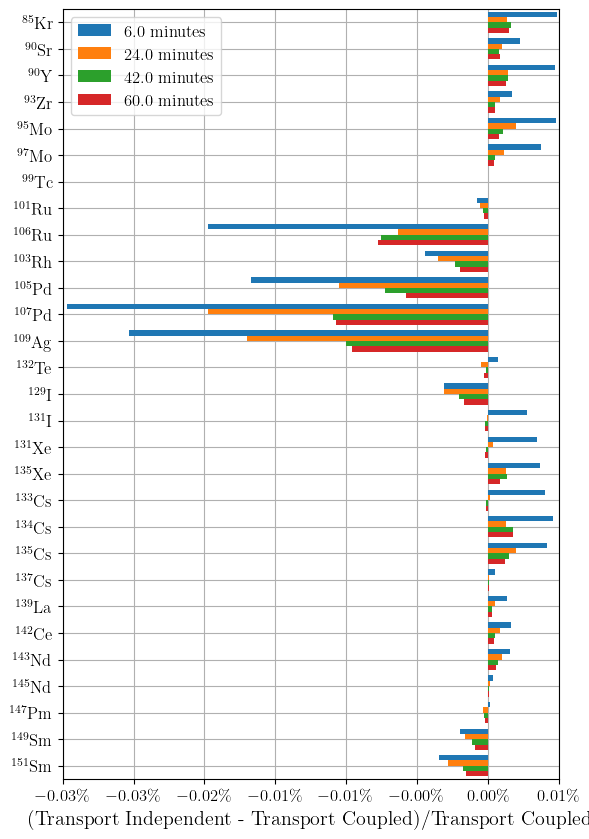

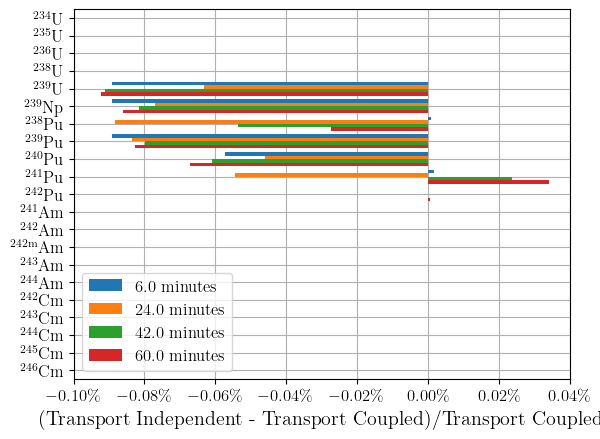

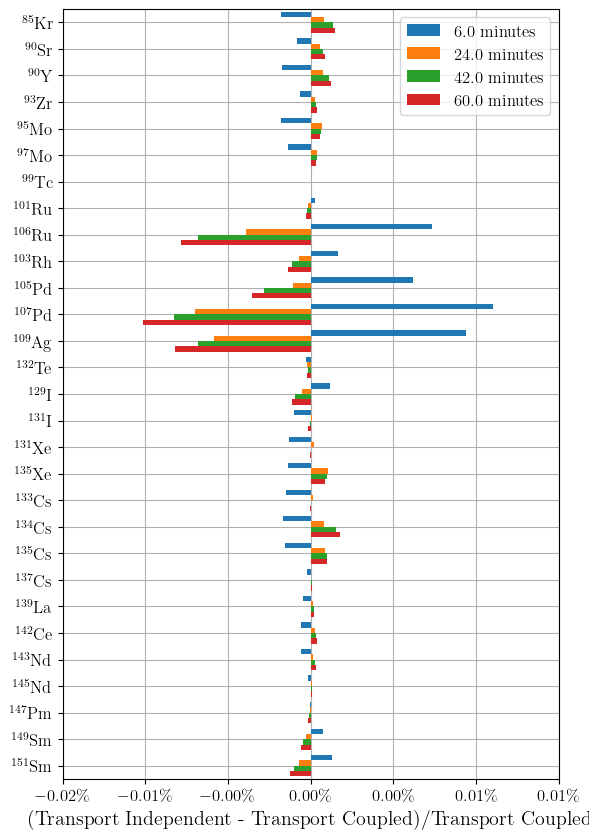

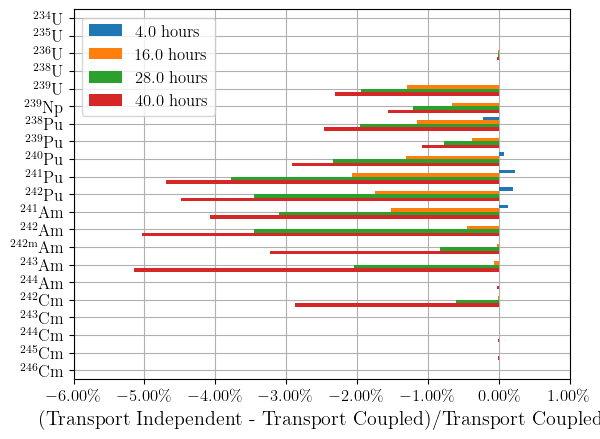

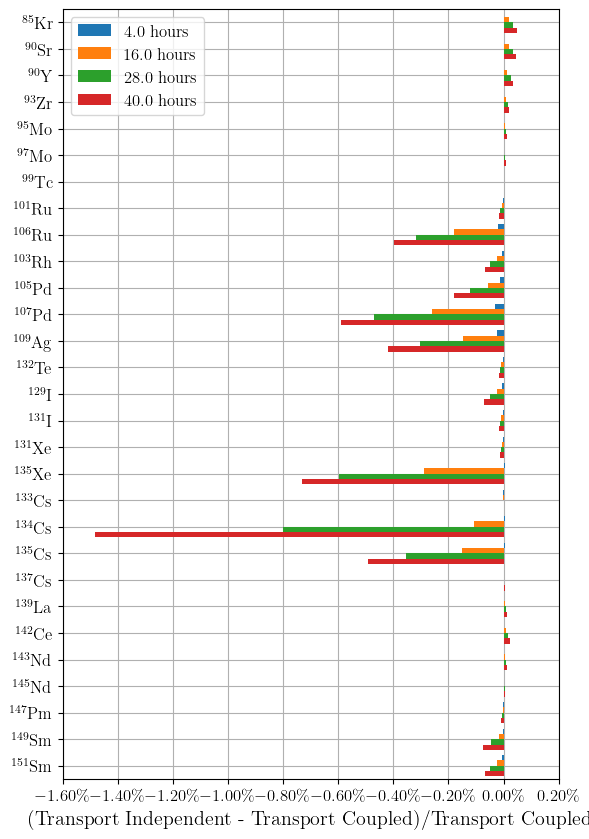

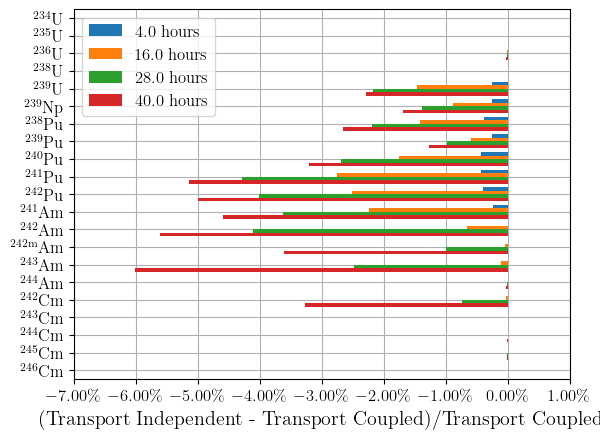

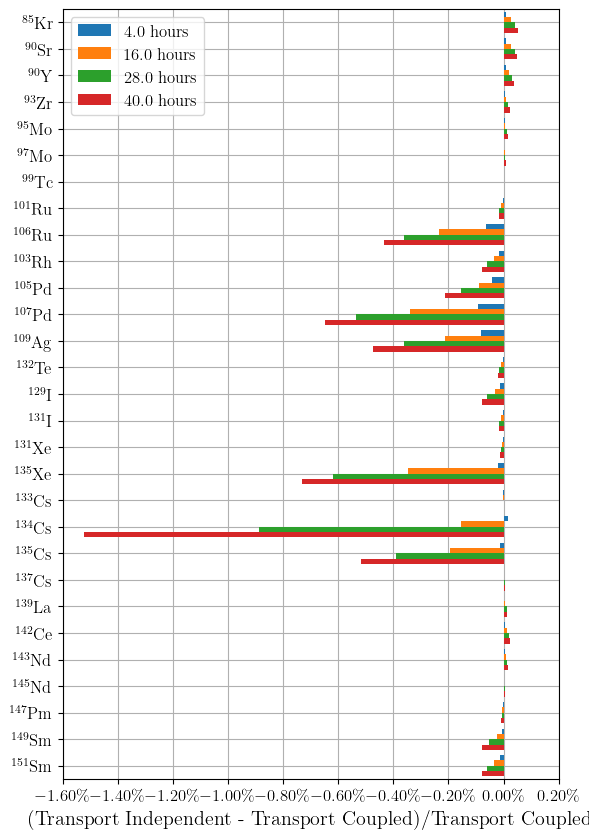

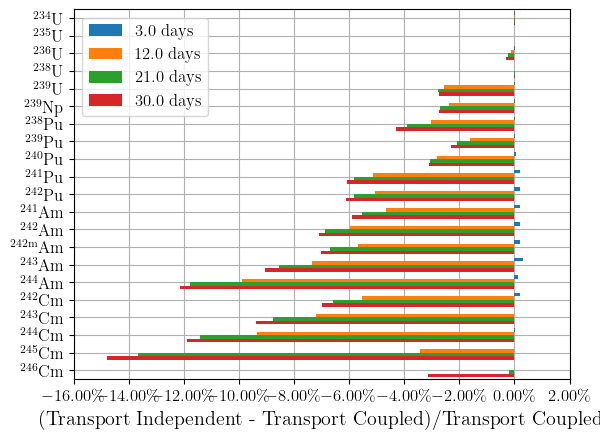

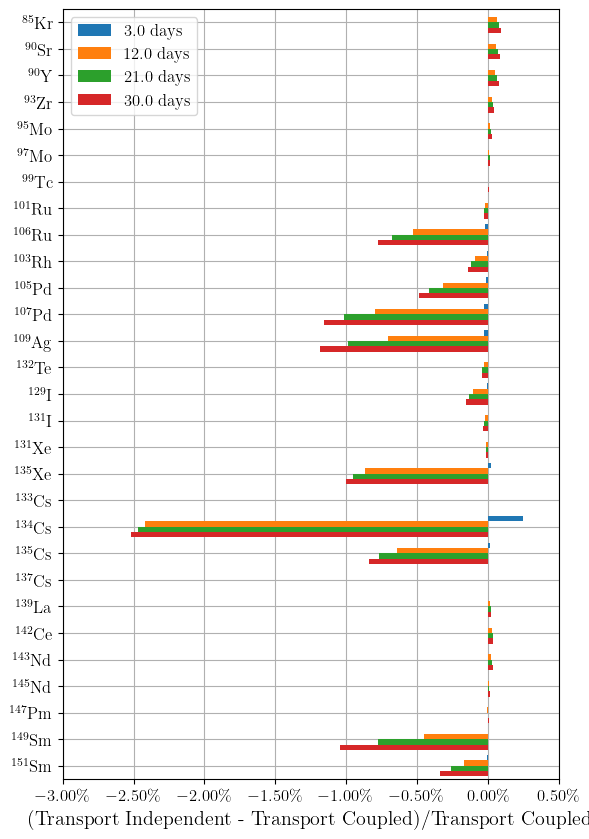

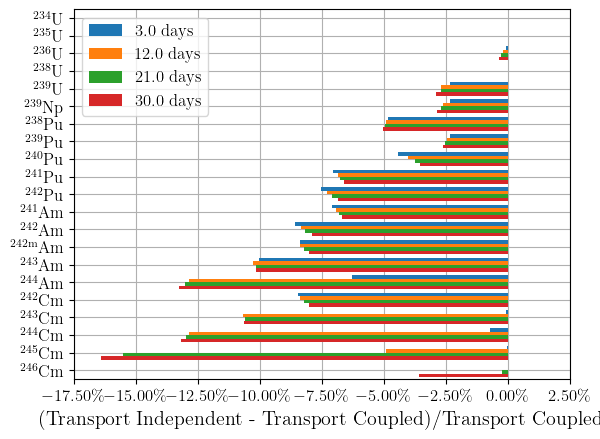

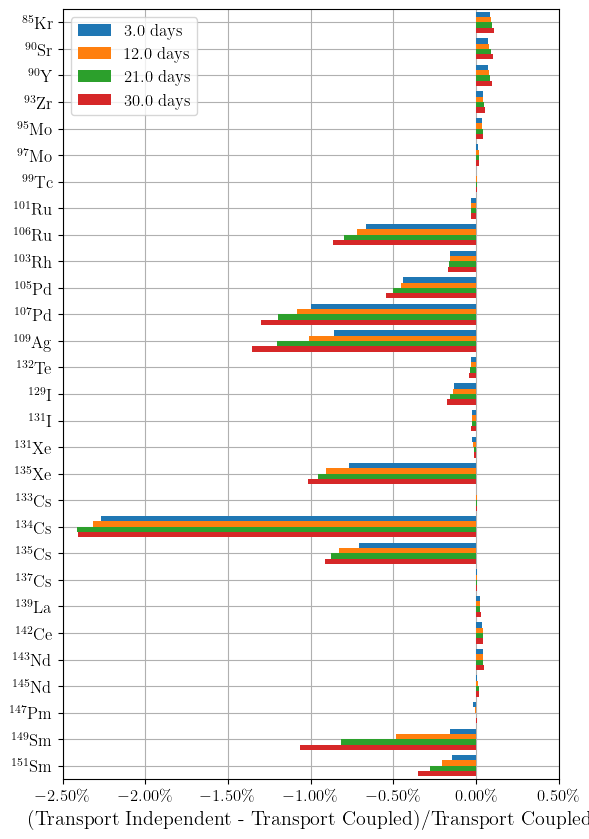

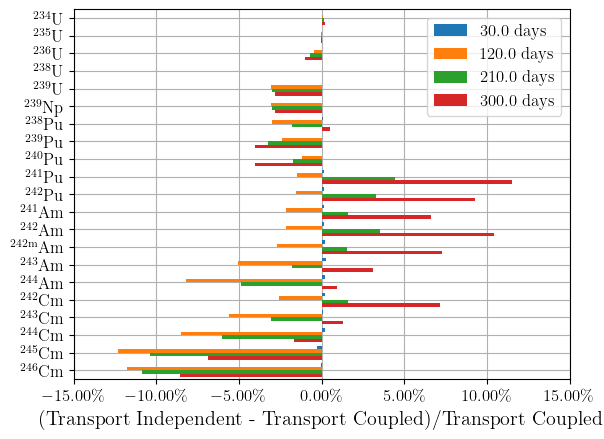

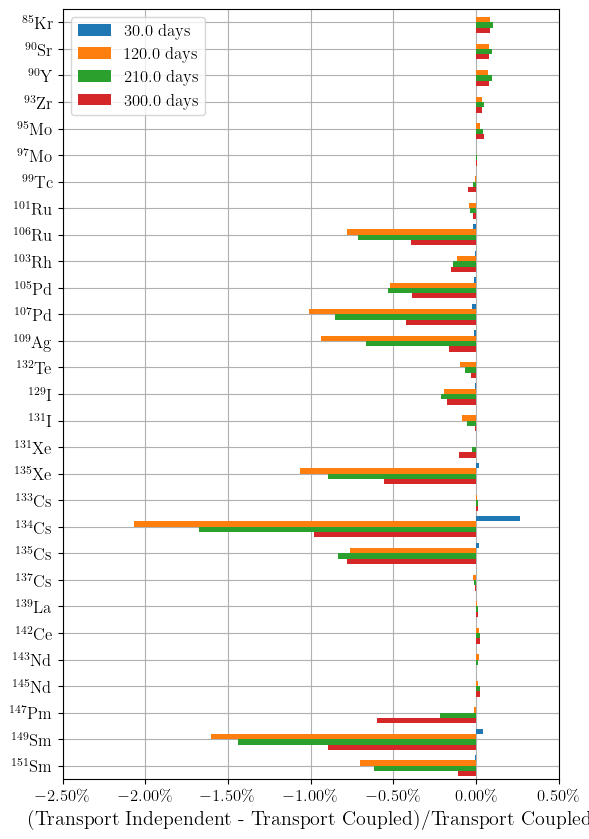

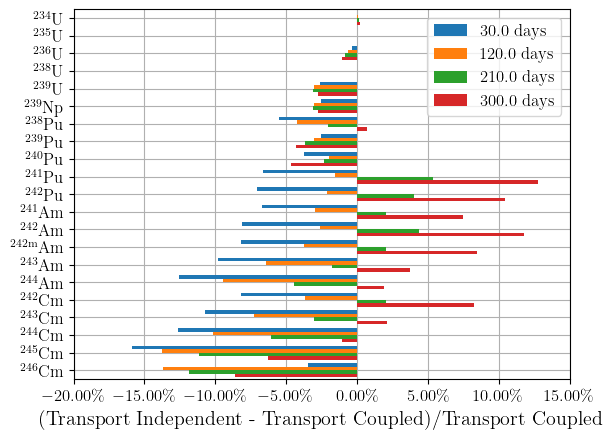

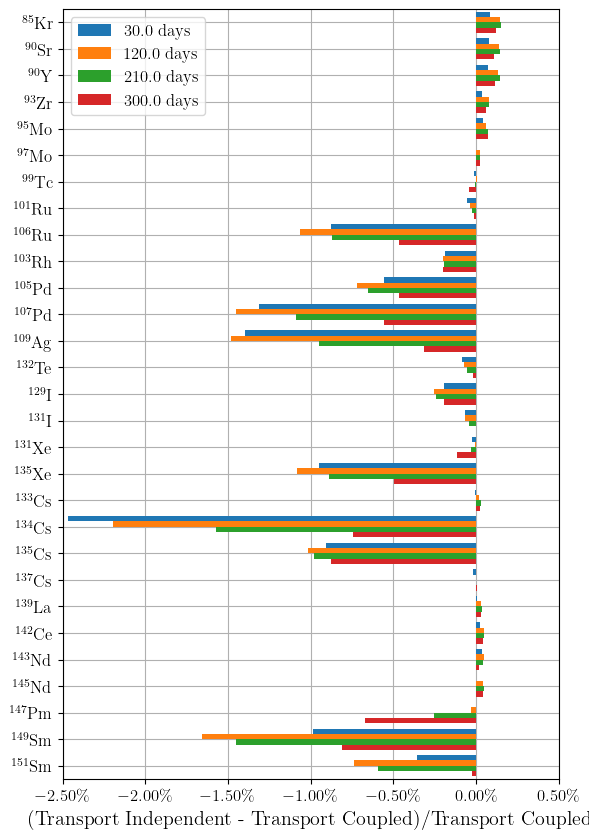

In [28]:
integrator_type = 'predictor'
normalization_type = 'fission_q'
depletion_type = 'full'
for group_type in group_types:
    for time_type in time_types.keys():
        for integrator_type in integrator_types:
            
            atoms_dict, rx_dict, time, time_unit = load_results(group_type, time_type, integrator_type, normalization_type, depletion_type)
            isotope_bar_plot(atoms_dict, time, time_unit, group_type,
                             time_type, integrator_type, normalization_type, depletion_type,
                             actinides, 'figs/actinides')
            kwargs = {'figsize': (6.4, 10.0)}
            isotope_bar_plot(atoms_dict, time, time_unit, group_type,
                             time_type, integrator_type, normalization_type, depletion_type,
                             fission_products, 'figs/fission_products', **kwargs)

In [29]:
atoms_dict['Am241'][1]

array([5.54176944e+02, 2.59742157e+12, 4.18919872e+13, 2.05045094e+14,
       6.18727046e+14, 1.43436572e+15, 2.81601790e+15, 4.93045430e+15,
       7.93913478e+15, 1.19918148e+16, 1.72215714e+16])

In [15]:
isinstance(nuc, str)

True